# UN Security Council data exploration with NLTK

## What frequency distributions can tell us about policy, decisionmaking and political will

I've always been interested in examining the patterns of policy speeches to shed light on decisionmaking processes, and my corpora of UN Security Council meeting records and resolutions provide excellent data exploration material in this regard. Below I'll demonstrate how a syntax error in my code helped illustrate one of the most frustrating trends in international policy - the lack of political will to "call a spade a spade". 

**Background: the problem with "genocide"**

**Act I. Rwanda.**

In the spring of 1994, nearly a million Rwandans, most of them ethnic Tutsis, were slaughtered in the span of several months during a civil war that became known as one of the most brutal conflicts in human history. Throughout this time and for many months thereafter, the United Nations, the Clinton Administration, and countless other prominent decisionmaking bodies refused to use the term "genocide" to refer to the reality on the ground in Rwanda. Though everyone understood that the systematic murder of individuals belonging (or thought to belong) to a specific group constitutes genocide, the legal implications of the use of the term would require decisive action on the part of the international community - action it was neither willing nor prepared to take. The U.S. State Department tiptoed around the issue by infamously referring to "acts of genocide [that] may have occurred" in Rwanda; when asked by a journalist how many "acts of genocide" are required for genocide to be recognized as having taken place, the State Department provided no substantive response. For many years following the Rwandan genocide, courts in France, a country which carefully and unconscionably backed the Hutu majority during the war based on long-standing ties, continued to attempt to promulgate the idea of a "double genocide" - the notion that Tutsis allegedly perpetrated just as many "acts of genocide" against the Hutus as did the Hutus against the Tutsis, and that both sides were to blame in equal measure for the horrors that followed.

**Act II. Bosnia.**

Between July 11-13 1995, over 8,000 Bosnian Muslim men and boys were massacred by Bosnian Serb factions in the enclave of Srebrenica, which had been declared a "safe area" by the UN two years prior. The Dayton Peace Accords were signed in December 1995, and in the years that followed, countless Serb officials and military commanders have been indicted on charges of genocide and war crimes by the International Criminal Tribunal for the former Yugoslavia (ICTY). Twenty years later, in July 2015, the Russian Federation, a supporter of the Serbs, vetoed a Security Council resolution that would have recognized the events that took place in Srebrenica in the summer of 1995 as "genocide", claiming the use of the term "genocide" in regards to Srebrenica was "not constructive, confrontational and politically motivated". 

As noted above, following World War II and the Nuremberg Trials, the term "genocide" took on legal and political implications - if genocide is proven or believed to have taken place, key players within the international community must act or else be prepared to answer uncomfortable questions on their inaction. Instances in which recognized political regimes (state actors) are believed to have perpetrated genocide, such as the extermination of Armenians by Ottoman authorities in 1915, continue to be highly contentious - if genocide is recognized as such, indictments, prosecutions, and reparations must follow. 

**Genocide in UN Security Council resolutions**

Exploring the text of UN Security Council resolutions from 1994 to 2014 allows us to see how the UN has struggled with accepting the use of the term "genocide" over the years.  

First, I built and read in a corpus of Security Council resolutions with the help of the Plaintext Corpus Reader within the Natural Language Toolkit (NTLK). All resolution files are available [on GitHub](https://github.com/wandergram/datsci/tree/master/UN/corpus).

In [1]:
import nltk
from nltk.corpus import PlaintextCorpusReader
corpus_root = 'corpus/unscr/' # set root directory
scrs = PlaintextCorpusReader(corpus_root, '.*') # define and read in corpus 
scrs.fileids() # prints out a list of all filenames in the format YEAR-DOCUMENTNUMBER.txt

['1994-N9400679.txt',
 '1994-N9403349.txt',
 '1994-N9404992.txt',
 '1994-N9405527.txt',
 '1994-N9406562.txt',
 '1994-N9409122.txt',
 '1994-N9411387.txt',
 '1994-N9411400.txt',
 '1994-N9412513.txt',
 '1994-N9413519.txt',
 '1994-N9413985.txt',
 '1994-N9414627.txt',
 '1994-N9415191.txt',
 '1994-N9416107.txt',
 '1994-N9416662.txt',
 '1994-N9418073.txt',
 '1994-N9418820.txt',
 '1994-N9418959.txt',
 '1994-N9419085.txt',
 '1994-N9419097.txt',
 '1994-N9419562.txt',
 '1994-N9420516.txt',
 '1994-N9420702.txt',
 '1994-N9420793.txt',
 '1994-N9421836.txt',
 '1994-N9422987.txt',
 '1994-N9423011.txt',
 '1994-N9423047.txt',
 '1994-N9423516.txt',
 '1994-N9423528.txt',
 '1994-N9423601.txt',
 '1994-N9424454.txt',
 '1994-N9424842.txt',
 '1994-N9425111.txt',
 '1994-N9425620.txt',
 '1994-N9425693.txt',
 '1994-N9426027.txt',
 '1994-N9426514.txt',
 '1994-N9427014.txt',
 '1994-N9427098.txt',
 '1994-N9427165.txt',
 '1994-N9427183.txt',
 '1994-N9427351.txt',
 '1994-N9427927.txt',
 '1994-N9429825.txt',
 '1994-N94

Next, I plotted the frequency distribution of the term "genocide" across years.

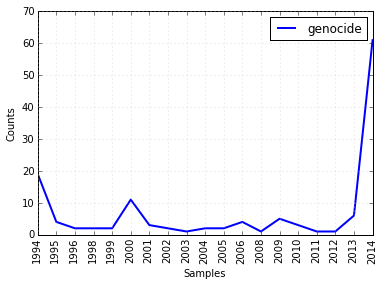

In [2]:
%matplotlib inline
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4]) # separates the years out of the filenames to use as points along the X axis
    for fileid in scrs.fileids()
    for w in scrs.words(fileid)
    for target in ['genocide'] 
    if w.lower().startswith(target)) # note the "startswith" - more on that below

cfd.plot()

The plot demonstrates some interesting trends: while the UN was generally hesitant to refer to genocide by name in the 1990s, the events (and humiliation) of that decade led the international community to reconsider its position on genocide in 2000, likely in light of the war in Kosovo. Though genocide continued throughout the world, notably in Darfur and South Sudan, in the first decade of the new millenium, the term did not get much airtime at the Security Council until 2014, when we see a sharp uptick in the number of references to genocide in Security Council resolutions. 

An educated hypothesis to explain this sea change has to do with the types of groups believed to have been responsible for genocide in 2014 - unlike in earlier cases, where the perpetrators were largely established state actors (regimes), 2014 saw an intensification of attacks against civilians by non-state actors such as ISIS and Boko Haram. Accusing a standing government of perpetrating genocide requires exceptional political will along a unified front, since the governments in question stand at the helm of UN member states and get a seat at the table in the UN General Assembly on par with everyone else. Moreover, calls for the prosecution of heads of state and government will surely follow such accusations, and that would make for very awkward diplomatic meetings. On the other hand, accusing an amorphous terrorist group of doing the same requires very little, so genocide is much easier to recognize as having taken place when the perpetrators operate outside of a multilateral intergovernmental community structure.  

You'll note that the code above includes the function "startswith" and searches for the full term "genocide". This was initially a mistake on my part - I should have searched for "genocid" to allow for the recognition of terms such as "genocidal" and "genocidaire(s)" (perpetrators of genocide, commonly used to refer to Rwandan and Congolese war criminals). However, searching for either of the terms above returns an error - neither term has been used in Security Council resolutions passed between 1994 and 2014:

In [3]:
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4]) 
    for fileid in scrs.fileids()
    for w in scrs.words(fileid)
    for target in ['genocidal', 'genocidaire'] 
    if w.lower().startswith(target))

cfd.plot()

UnboundLocalError: local variable 'legend_loc' referenced before assignment

The fact that neither "genocidal" (understood to most frequently be used in the collocation "genocidal regime") nor "genocidaire(s)" have been used in Security Council resolutions is an interesting reflection of the point made earlier - the Security Council shies away from making bold statements accusing regimes and their officials of genocide. In cases where standing regimes are implicated in war crimes, such as those of Darfur and South Sudan (from 2003 onward), the Council seems to prefer the terms "atrocity (-ies)", "massacre(s)", and "cleansing" (presumed to always be used in the collocation "ethnic cleansing"):

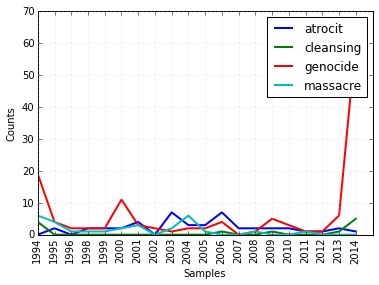

In [4]:
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4]) 
    for fileid in scrs.fileids()
    for w in scrs.words(fileid)
    for target in ['atrocit', 'massacre', 'cleansing', 'genocide'] 
    if w.lower().startswith(target))

cfd.plot()

Though ethnic cleansing is a legally defined war crime, it does not always constitute genocide and may consist of expelling civilians from the territories they inhabit, but not necessarily murdering them. "Atrocities" and "massacres" have no legal definition and as such can be used relatively "freely", since there is no clearly defined legal point at which the number of "atrocities" committed reaches a critical mass and must be dealt with by an international tribunal.  